## Tensors, or How to Make A Billion Dollars This Century

1.3 billion humans are able to use Microsoft Excel. Microsoft Excel is the modern clay tablet, an intuitive but ultimately limited instrument for the computational professional. After all, why should we be limited to two dimensions? Why should we pay for the priveledge? Often, data is best represented as $n$-dimensional.

For instance, let's say you'd like become a billionaire without too much effort. One way would be to totally automate clinical bioimage analysis at human-level fidelity using machine learning. This shouldn't be too hard.

![](10009_right.png)
<span class="caption">Diabetic retinopathy slide (https://www.kaggle.com/c/diabetic-retinopathy-detection). It is estimated to affect over 93 million people.</span>


Whereas a highly skilled human could potentially spot abnormalities in the above retinopathy slide, a machine can do it better and much faster. Partially, this is because a machine views the below image somewhat naïvely as 150,528 dots, as we have a square RGB  image with with 224 pixels per dimension.

Viewing the image not as an image but as a tensor, we  simply vector-valued matrices, or an $n$-dimensional generalization of a matrix, we can then move onto analyzing the image: segmentation, feature learning, classification (if labels are detected), and other interesting tasks that a human may or may not be able to do.

## Numpy

We use Numpy for efficient vectorized tensor manipulation with the convenient abstraction of the Python programming language. Numpy fuency will carry a computational professional very far, and it will only begin to show limitations when deep learning and very large datasets are involved (though the syntax of major deep learning packages are very close to Numpy)

We can easily load the above png "image" into a numpy array using a number of packages. ```imageio``` is used below.


In [34]:
import imageio
import numpy as np

my_image = imageio.imread('10009_right.png')
my_image

Array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Above we see the image loaded into memory as an integer-valued 3-dimensional matrix. Basic Numpy / Python fluency is assumed (slicing, etc.).

In [12]:
my_image.shape #note memory persistence in Jupyter.

(224, 224, 3)

In [9]:
my_image.size

150528

In [10]:
my_image.ndim

3

The $224 \times 224 \times 3$, $150,528$-element, $3$-dimensional array can be now be subject to a multitude of useful manipulations.

For instance, we can sparsify the matrix using ```scipy.sparse``` for 2-d matrices and ```sparse``` (```!pip install sparse```) for $n$-dimensional arrays (tensors). This may be useful for quick compression or storage of many such images: note the large number of zero values corresponding to "black" portions of the image.

In [7]:
import sparse
sparse.COO(my_image)

Format,coo
Data Type,uint8
Shape,"(224, 224, 3)"
nnz,120885
Density,0.8030731823979592
Read-only,True
Size,2.9M
Storage ratio,20.1


The sparse matrix in general is less memory intensive.

Another example of manipulation: we can  quickly invert and flip the image with numerical rigor. We will use ```matplotlib``` to display the numpy array.

In [30]:
np.invert is np.bitwise_not

True

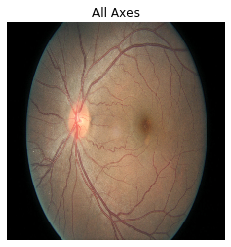

In [19]:
import matplotlib.pyplot as plt

plt.imshow(my_image)
plt.axis('off')
plt.title('All Axes')
plt.show()

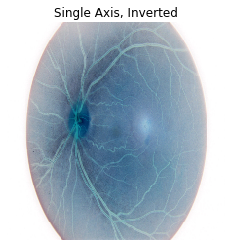

In [24]:
plt.imshow(np.invert(my_image))
plt.axis('off')
plt.title('Inverted (Bitwise NOT; twos-complement)')
plt.show()

Said another way...

In [41]:
255 - my_image[100,100,:] == np.invert(my_image)[100,100,:] #we are in 256-bit color.

Array([ True,  True,  True])

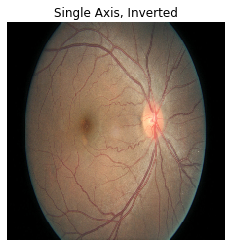

In [39]:
plt.imshow(np.fliplr(my_image))
plt.axis('off')
plt.title('Flipped (LR)')
plt.show()

This leads to some intuitive operations. For instance, if we were looking to feature-engineer such image data for use in a statistical learning classifier, we may hypothesize the location of the fovea (bright central spot) as a useful aspect of the retinopathy image.

I'm betting we can segment these features with a single line of numpy. For this and subsequent examples, let's take a sample of the first sheet (zeroth index) of the image for simplicity such that we have a 2-d array (pretend we read-in a greyscale image).

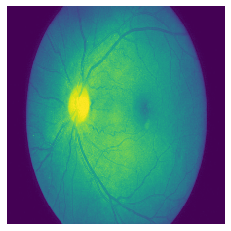

In [97]:
x = my_image[:,:,0] #take all elements of the first sheet/leaf of the array.
plt.imshow(x)
plt.axis('off')
plt.show()

Now for the single line. We will find the bright portion by the assumption that we can find it by taking $region = \frac{\sum_i x_i}{N} * 2 * \sigma(\vec{x})$, or all pixels with intensity greater than equal to two standard deviations above the mean.



In [99]:
x = my_image[:,:,0] #take all elements of the first sheet/leaf of the array.
mask = (x >= x.mean() + 2*x.std())

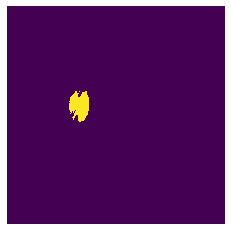

In [100]:
plt.imshow(mask)
plt.axis('off')
plt.show()

We can then get the coordinates in the array simply: 

In [108]:
coords = np.argwhere(x == mask)
coords

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [223, 221],
       [223, 222],
       [223, 223]])

In [107]:
print(coords.size)

20656


If we knew *a priori* that a particular type of retinopathy was characterized by abnormal foveal locations, and we had a sufficient train/test/validation dataset, we could reduce the size of our dataset significantly with such an engineered feature.

In [115]:
print(f'If we only require foveal coordinates, our dataset may be reduced by {round(100-(coords.size/my_image.size)*100,2)}% !')

If we only require foveal coordinates, our dataset may be reduced by 86.28% !


## Canonical Numpy

Taking a subset of the image for illustrative purposes.

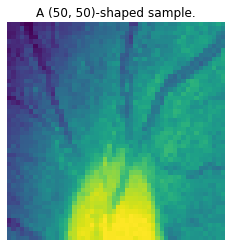

Array([[110, 112, 112, ..., 182, 190, 182],
       [110, 111, 114, ..., 176, 180, 171],
       [107, 108, 116, ..., 180, 167, 161],
       ...,
       [143, 127, 138, ..., 178, 182, 185],
       [146, 149, 142, ..., 180, 182, 179],
       [145, 153, 144, ..., 175, 183, 181]], dtype=uint8)

In [49]:
x = my_image[50:100,50:100,0]
plt.imshow(x)
plt.axis('off')
plt.title(f'A {x.shape}-shaped sample.')
plt.show()
x

## Reshaping, Flattening, Transposing (skipped)

These operations are useful for downstream tasks. Flattening reshapes the array into a vector.


## Rank, Determinant, Diagonal, Trace (skipped)
